In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

##I added inspect to the imports for I can view the data easily 

In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# Declare a Base using `automap_base()`

Base = automap_base()

# Use the Base class to reflect the database tables

Base.prepare(autoload_with = engine)

In [7]:
# Print all of the classes mapped to the Base

Base.classes.keys()

['measurement', 'station']

In [8]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session

session = Session(engine)

In [11]:
##Viewing the data so I know what we are working with 

inspector = inspect(engine)
tables = inspector.get_table_names()
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

measurement
--------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
--------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

##If I order by descending date and call for the first entry, it should give me the most recent date in the data

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
##This should be all info from 2016-08-23 to 2017-08-23

# Perform a query to retrieve the data and precipitation scores
##Note instructions say to choose date and precipitation only 

measurement_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

measurement_df = pd.DataFrame(measurement_query)
measurement_df.columns = ['Date', 'Precipitation']

# Sort the dataframe by date

measurement_df.sort_values('Date')

measurement_df.head()


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


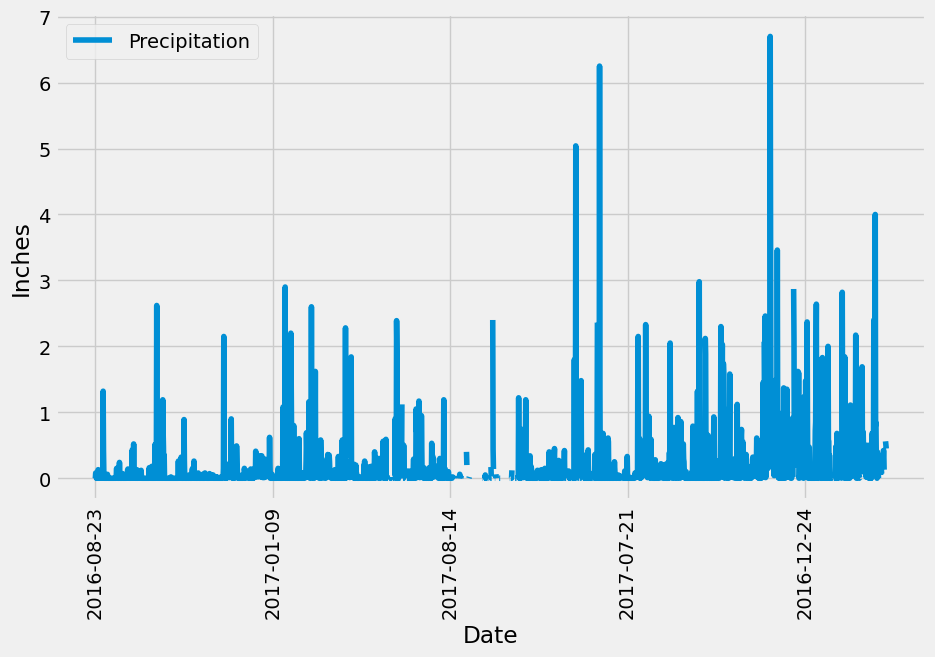

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

measurement_df.plot(x='Date', y='Precipitation', figsize=(10,6), rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_df = pd.DataFrame(measurement_df.Precipitation.describe())
summary_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset

session.query(Station.id).count()


9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_counts = func.count(Measurement.station)
station_info = session.query(Measurement.station, station_counts).group_by(Measurement.station).order_by(station_counts).all()
station_info

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [18]:
##The station with the most entries in the data set is USC00519281 with 2772 rows of data

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

##Need to find lowest, highest, and avg tobs (temperature of observation) and just filter by station USC00519281 

low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print('Lowest temp: ', low_temp)
print('Highest temp: ', high_temp)
print('Average temp: ', avg_temp)

Lowest temp:  [(54.0,)]
Highest temp:  [(85.0,)]
Average temp:  [(71.66378066378067,)]


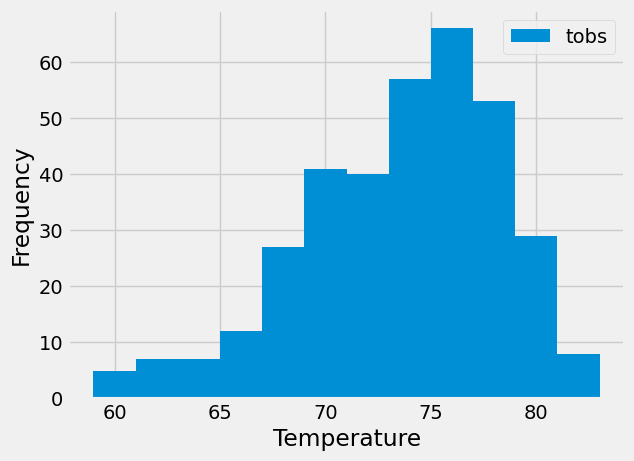

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_info = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-23').all()
df = pd.DataFrame(active_info)
df.plot.hist(bins = 12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [21]:
# Close Session
session.close()
